In [1]:
import tensorflow as tf
import bayesflow as bf
import numpy as np
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from bayesflow.trainers import Trainer
from model import model, configurator_backward
from networks import Classifier, AmortizedMixture, Backward, Reverse

train = True

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 4)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 100, 2)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [2]:
trainer = Trainer(
    amortizer=AmortizedMixture(
        inference_net=Sequential(
            [
                LSTM(32, return_sequences=True),
                Classifier(n_classes=2, n_units=[32, 16, 8, 4, 2])
            ]
        ),
        local_summary_net=LSTM(units=128, return_sequences=True),
        ), 
    generative_model=model, 
    configurator=configurator_backward, 
    checkpoint_path="checkpoints/backward"
)

INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [3]:
%time
if train:
    h = trainer.train_online(epochs=100, iterations_per_epoch=250, batch_size=32)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 1.67 µs


Training epoch 17:  73%|███████▎  | 182/250 [00:15<00:06,  9.87it/s, Epoch: 17, Iter: 182,Loss: 0.212,Avg.Loss: 0.193,LR: 4.66E-04]

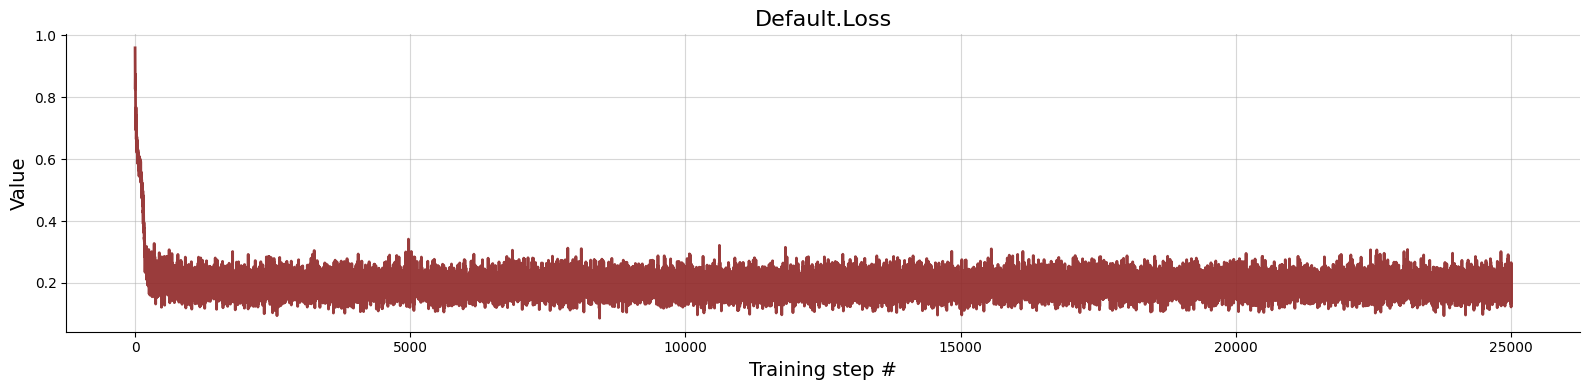

In [ ]:
if train:
    f = bf.diagnostics.plot_losses(h)